### Apartment prices

We start by collecting the data about appartement prices in Ekhagen from the file "Booli_sold.csv" and storing it as the dataframe "df1".  

In [9]:
import pandas as pd

df1 = pd.read_csv("Booli_sold.csv")

We want to add a new column "ppsqm" (price per squaremeter) into the dataframe df1, so we create a list containing the price per squaremeter for each appartement and add it into df1 as column 10, right after the column 'soldPrice'. 

In [10]:
ppsqm=[]
for index in df1.index:
    ppsqm.append(df1.loc[index]['soldPrice']/df1.loc[index]['livingArea'])

df1.insert(10,'ppsqm',ppsqm,True)

df1.iloc[:,range(11)].head()

,listPrice,rent,livingArea,rooms,published,constructionYear,objectType,booliId,soldDate,soldPrice,ppsqm
0,3995000,4467.0,73.0,3.0,2018-10-15 13:33:18,1935.0,Lägenhet,3263989,2018-11-08,3820000,52328.767123
1,1995000,1773.0,36.0,1.0,2018-10-05 14:29:28,1968.0,Lägenhet,3256231,2018-10-19,2355000,65416.666667
2,5100000,3839.0,81.0,3.0,2018-09-11 13:44:43,1936.0,Lägenhet,3236660,2018-09-27,6110000,75432.098765
3,5495000,4483.0,107.0,4.0,2018-08-25 02:56:56,1936.0,Lägenhet,3224374,2018-09-06,8050000,75233.644860
4,1995000,1696.0,29.0,1.0,2018-06-15 17:16:19,1936.0,Lägenhet,3185496,2018-06-18,2400000,82758.620690


To find out which appartements that have the highest price per squaremeter so will we sort the rows in df1 in respect to highest ppsqm to lowest ppsqm. 

In [11]:
df=df1.sort_values(by = 'ppsqm', ascending=False)
df.iloc[:,range(11)].head()

,listPrice,rent,livingArea,rooms,published,constructionYear,objectType,booliId,soldDate,soldPrice,ppsqm
67,1595000,1464.0,24.0,1.0,2016-01-07 14:51:06,1935.0,Lägenhet,2018259,2016-01-21,2500000,104166.666667
50,1890000,1464.0,24.0,1.0,2016-06-11 08:55:51,1935.0,Lägenhet,2125576,2016-06-21,2450000,102083.333333
54,1795000,1374.0,23.0,1.0,2016-04-15 19:10:49,1935.0,Lägenhet,2078171,2016-04-28,2300000,100000.000000
34,1750000,1144.0,25.0,1.0,2017-05-18 16:20:57,1936.0,Lägenhet,2330886,2017-06-01,2210000,88400.000000
55,1895000,1522.0,26.9,1.0,2016-04-01 22:56:37,1968.0,Lägenhet,2067384,2016-04-19,2300000,85501.858736


We can in the table above see the five appartements with the highest price per squaremeter. 

We now want to find out what the average price per squaremeter is for the appartements. We start by adding all the values in the column 'soldPrice' to get the total price of all the appartements, and then we do the same for all the values in the column 'livingArea'. We then divide the sum of 'soldPrice' with the sum of 'livingArea' to get the average ppsqm:

In [12]:
tot_price = df1['soldPrice'].sum()

tot_area = df1['livingArea'].sum()

print(tot_price/tot_area)

56844.561210885426


So we get that the average ppsqm is approximately 56800. 

I think that a very interesting aspect of the data we have viewed in df1 is the top five appartements when it comes to highest ppsqm. We can see that all these appartement also have a very small 'livingArea', which of course is somewhat expected since 'livingArea' and 'ppsqm' are inversely proportional, but what I think is especially interesting is how there are **only** appartements with small 'livingArea' in the top five. This indicates that 'livingArea' and 'soldPrice' don't grow in a proportional manner in respect to eachother, which I think would be an interesting thing to explore further. 

### The Swedish Election of 2018

We start by collecting the data about the swedish election of 2018 from the file "2018_R_per_kommun.csv" and storing it as the dataframe "df2"

In [13]:
df2 = pd.read_csv("2018_R_per_kommun.csv", sep = ";", decimal = ",")

We now calculate the number of legitimate votes in Stockholm from the election. 

In [14]:
sthlm_votes=0
for index in df2.index:
    if df2.loc[index]['LÄNSNAMN'] == "Stockholms län":
        sthlm_votes += df2.loc[index]['RÖSTER GILTIGA']
print(sthlm_votes)

1426237


We can see that the number of legitimate votes in Stockholm was 1426237. 

We now want to investigate in which munipality the social democratic party ('S') got the highest voting percentage in the election. 

In [15]:
highest_s = ""
current_highest = 0
for index in df2.index:
    if df2.loc[index]['S'] > current_highest:
        current_highest = df2.loc[index]['S']
        highest_s =  df2.loc[index]['KOMMUNNAMN']
print(highest_s)

Munkfors


We can see that the munipality Munkfors had the highest percentage of votes on the social democratic party. 

We now want to investigate the munipalities with highest voting participation ('VALDELTAGANDE').

In [16]:
df=df2.sort_values(by='VALDELTAGANDE', ascending = False)
df.head(3)

,LÄNSKOD,KOMMUNKOD,LÄNSNAMN,KOMMUNNAMN,M,C,L,KD,S,V,...,TRP,VL-S,ÖVR,OGEJ,BLANK,OG,RÖSTER GILTIGA,RÖSTANDE,RÖSTBERÄTTIGADE,VALDELTAGANDE
103,12,62,Skåne län,Lomma,33.16,9.33,9.97,6.38,16.69,2.54,...,NaN,NaN,NaN,NaN,0.51,0.04,16401,16492,17570,93.86
59,6,43,Jönköpings län,Habo,19.73,8.77,4.22,15.13,23.74,3.91,...,NaN,NaN,NaN,0.06,0.88,0.06,7746,7825,8382,93.35
98,12,33,Skåne län,Vellinge,39.56,7.24,7.26,7.45,10.58,1.31,...,0.0,NaN,NaN,0.02,0.40,0.04,25245,25360,27231,93.13


We can in the table above see that the three munipalities with the highest voting participation was Lomma, Habo and Vellinge. 

### Plot of strokecases

We start by loading the file "stroke-data.csv" as the dataframe "df3".

In [17]:
df3 = pd.read_csv("stroke-data.csv")

We want to check if there is any correlation between age and getting a stroke and we will do this through a plot. We first want to check so that the file "stroke-data.csv" contains a fairly even distribution of ages, so that the results won't be misleading. 

array([[<Axes: title={'center': 'age'}>]], dtype=object)

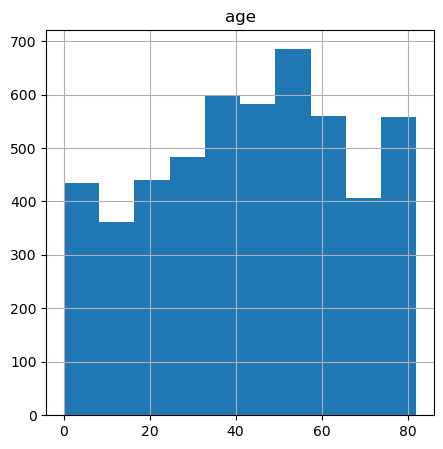

In [18]:
df5=df3.loc[:,['age']]
df5.hist(figsize=(5,5))

We can see that the ages are fairly even distributed and we can also compare this histogram, with the histogram of the ages of the patients that have had a stroke, to be sures that the fact that the ages is not completely even distributed have an effect un the result. We create a new similar plot but only for the patients that have had a stroke. 

array([[<Axes: title={'center': 'age'}>]], dtype=object)

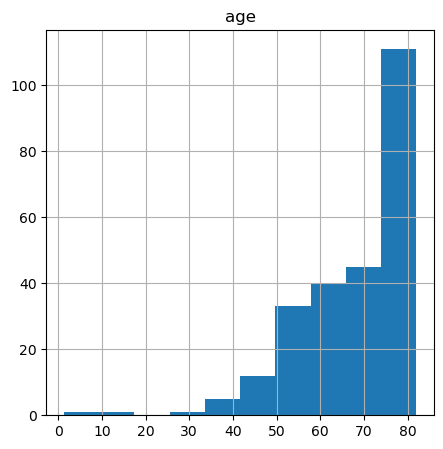

In [19]:
df=df3.sort_values(by='stroke', ascending=False)

loop=True 
last_stroke=0
row=0
while (loop):
    if df.loc[row]['stroke'] == 0:
        last_stroke=row
        loop=False
    row+=1

df4=df.loc[:,['age']]

df4.head(last_stroke).hist(figsize=(5,5))

We can see that even though we have approximately the same amount of people in each agegroup, so are almost all strokecases recorded for people over 50, where people over 70 are very overrepresented. So there definitely seems to be a correlation between age and having a stroke. 